Prediction price car With Lasso

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('2223_clean.csv')

In [ ]:
df

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
3,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
4,2024 Nissan Murano Platinum,\n \n Boasts 28 Highway MPG and 20...,Nissan,Murano,New,2024,46000.0,24V MPFI DOHC,6.0,Gasoline,3838.0,Automatic CVT,Platinum,SUV,4.0,White,Gray,All-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,2024 BMW X7 xDrive40i,2024 BMW X7 xDrive40i,BMW,X7,New,2024,88695.0,24V GDI DOHC Turbo,6.0,Gasoline,9.0,8-Speed Automatic,xDrive40i,SUV,4.0,Sparkling,Black,All-wheel Drive
641,2024 Mercedes-Benz Sprinter 2500 144 WB Standa...,2024 Mercedes-Benz Sprinter 2500 Passenger 144...,Mercedes-Benz,Sprinter 2500,New,2024,69017.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,144 WB Standard Roof Passenger,Passenger Van,3.0,Jet Black,Black,Rear-wheel Drive
642,2024 RAM 3500 Tradesman,\n \n This Ram 3500 boasts a Inter...,RAM,3500,New,2024,60925.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,Automatic,Tradesman,Pickup Truck,4.0,Delmonico Red Pearlcoat,Black,Four-wheel Drive
643,2024 Kia Telluride SX X-Pro,Wolf Gray 2024 Kia Telluride SX X-Pro AWD 8-Sp...,Kia,Telluride,New,2024,51965.0,"II 3.8L V-6 gasoline direct injection, DOHC, D...",6.0,Gasoline,8.0,Automatic,SX X-Pro,SUV,4.0,Gray,Black,All-wheel Drive


In [ ]:
df.columns

Index(['name', 'description', 'make', 'model', 'type', 'year', 'price',
       'engine', 'cylinders', 'fuel', 'mileage', 'transmission', 'trim',
       'body', 'doors', 'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [ ]:
df['make'].value_counts()

make
Jeep             140
Dodge             93
Hyundai           70
RAM               65
Ford              47
Chevrolet         39
Mazda             33
Nissan            32
Volkswagen        28
Kia               17
GMC               11
Honda             11
Mercedes-Benz     10
Audi               9
BMW                7
Toyota             7
Chrysler           6
Buick              6
INFINITI           4
Land Rover         4
Cadillac           2
Lincoln            1
Lexus              1
Subaru             1
Volvo              1
Name: count, dtype: int64

2. Remove NaN Values
Menghapus nilai yang kosong/NaN

In [ ]:
# Drop the rows where at least one element is missing
# Menghapus baris yang mempunyai nilai kosong/NaN
df = df.dropna()

# Save the result to a new csv file
# Menyimpan hasil file
df.to_csv('2223_clean.csv', index=False)

3. Duplikasi dataset dan mengganti nilai kategorikal menjadi numeric dengan Label Encoder.
Ada 2 cara untuk mengganti nilai Kategori menjadi Numeric dengan menggunakan Label Encoder atau OneHot Encoder.

In [ ]:
# Duplikasi df, agar df asli tidak tergantikan
# Bisa memakai Label Encoder/OneHotEncoder, disini memakai OneHotEncoder
from sklearn.preprocessing import LabelEncoder

df3 = df.copy()
le1, le2, le3, le4, le5, le6, le7 = LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()
df3['model'] = le1.fit_transform(df3['model'])
df3['make'] = le2.fit_transform(df3['make'])
df3['engine'] = le3.fit_transform(df3['engine'])
df3['transmission'] = le4.fit_transform(df3['transmission'])
df3['fuel'] = le5.fit_transform(df3['fuel'])
df3['body'] = le6.fit_transform(df3['body'])
df3['drivetrain'] = le7.fit_transform(df3['drivetrain'])
df3

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,predicted_price
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",12,98,New,2024,74600.0,22,6.0,2,10.0,12,Series II,6,4.0,White,Global Black,1,77836.991329
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,12,38,New,2024,50170.0,56,6.0,2,1.0,12,Laredo,6,4.0,Metallic,Global Black,1,46955.540720
2,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,6,21,New,2023,46835.0,12,8.0,2,32.0,12,Pursuit,6,4.0,White Knuckle Clearcoat,Black,0,47242.590498
3,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,20,1,New,2024,81663.0,18,6.0,0,10.0,4,Laramie,5,4.0,Silver,Black,1,78256.564634
4,2024 Nissan Murano Platinum,\n \n Boasts 28 Highway MPG and 20...,19,50,New,2024,46000.0,24,6.0,2,3838.0,25,Platinum,6,4.0,White,Gray,0,45972.231165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,2024 BMW X7 xDrive40i,2024 BMW X7 xDrive40i,1,102,New,2024,88695.0,21,6.0,2,9.0,12,xDrive40i,6,4.0,Sparkling,Black,0,89248.262552
641,2024 Mercedes-Benz Sprinter 2500 144 WB Standa...,2024 Mercedes-Benz Sprinter 2500 Passenger 144...,18,81,New,2024,69017.0,5,4.0,0,10.0,20,144 WB Standard Roof Passenger,4,3.0,Jet Black,Black,3,61559.690848
642,2024 RAM 3500 Tradesman,\n \n This Ram 3500 boasts a Inter...,20,1,New,2024,60925.0,18,6.0,0,10.0,24,Tradesman,5,4.0,Delmonico Red Pearlcoat,Black,1,61441.058424
643,2024 Kia Telluride SX X-Pro,Wolf Gray 2024 Kia Telluride SX X-Pro AWD 8-Sp...,13,84,New,2024,51965.0,54,6.0,2,8.0,24,SX X-Pro,6,4.0,Gray,Black,0,49426.172085


4. Membuat Korelasi dari variabel yang terdapat pada dataset, serta membuat heatmap dan plot nya.

In [ ]:
# Membuat korelasi dari variabel yang terdapat pada dataset
df_correlation = df3[['make', 'model', 'year','price', 'engine', 'cylinders', 'fuel', 'mileage', 'transmission', 'body', 'doors', 'drivetrain']]
df_correlation

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,body,doors,drivetrain
0,12,98,2024,74600.0,22,6.0,2,10.0,12,6,4.0,1
1,12,38,2024,50170.0,56,6.0,2,1.0,12,6,4.0,1
2,6,21,2023,46835.0,12,8.0,2,32.0,12,6,4.0,0
3,20,1,2024,81663.0,18,6.0,0,10.0,4,5,4.0,1
4,19,50,2024,46000.0,24,6.0,2,3838.0,25,6,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
640,1,102,2024,88695.0,21,6.0,2,9.0,12,6,4.0,0
641,18,81,2024,69017.0,5,4.0,0,10.0,20,4,3.0,3
642,20,1,2024,60925.0,18,6.0,0,10.0,24,5,4.0,1
643,13,84,2024,51965.0,54,6.0,2,8.0,24,6,4.0,0


In [ ]:
df_correlation.corr().T

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,body,doors,drivetrain
make,1.000000,-0.121399,0.183703,0.086009,0.133419,-0.067511,-0.225208,-0.012352,0.221947,-0.067917,-0.111197,0.179577
model,-0.121399,1.000000,0.191662,-0.042924,-0.083838,-0.097360,0.259046,0.091529,-0.063655,-0.126831,-0.069660,0.061680
year,0.183703,0.191662,1.000000,0.014940,0.102797,-0.391938,0.008071,-0.102240,0.059610,0.012057,0.062090,-0.005144
price,0.086009,-0.042924,0.014940,1.000000,0.082912,0.486976,-0.313930,0.106259,-0.082216,-0.244625,-0.112097,-0.040744
engine,0.133419,-0.083838,0.102797,0.082912,1.000000,-0.024505,-0.149639,0.031556,0.418519,-0.009850,0.044691,0.003186
cylinders,-0.067511,-0.097360,-0.391938,0.486976,-0.024505,1.000000,-0.343101,0.028548,0.004020,-0.209704,-0.148300,0.068817
fuel,-0.225208,0.259046,0.008071,-0.313930,-0.149639,-0.343101,1.000000,0.006633,-0.093225,0.285147,0.118766,-0.195218
mileage,-0.012352,0.091529,-0.102240,0.106259,0.031556,0.028548,0.006633,1.000000,-0.056857,-0.043260,-0.033357,0.040313
transmission,0.221947,-0.063655,0.059610,-0.082216,0.418519,0.004020,-0.093225,-0.056857,1.000000,-0.092062,0.007328,0.037252
body,-0.067917,-0.126831,0.012057,-0.244625,-0.009850,-0.209704,0.285147,-0.043260,-0.092062,1.000000,0.625661,-0.218565


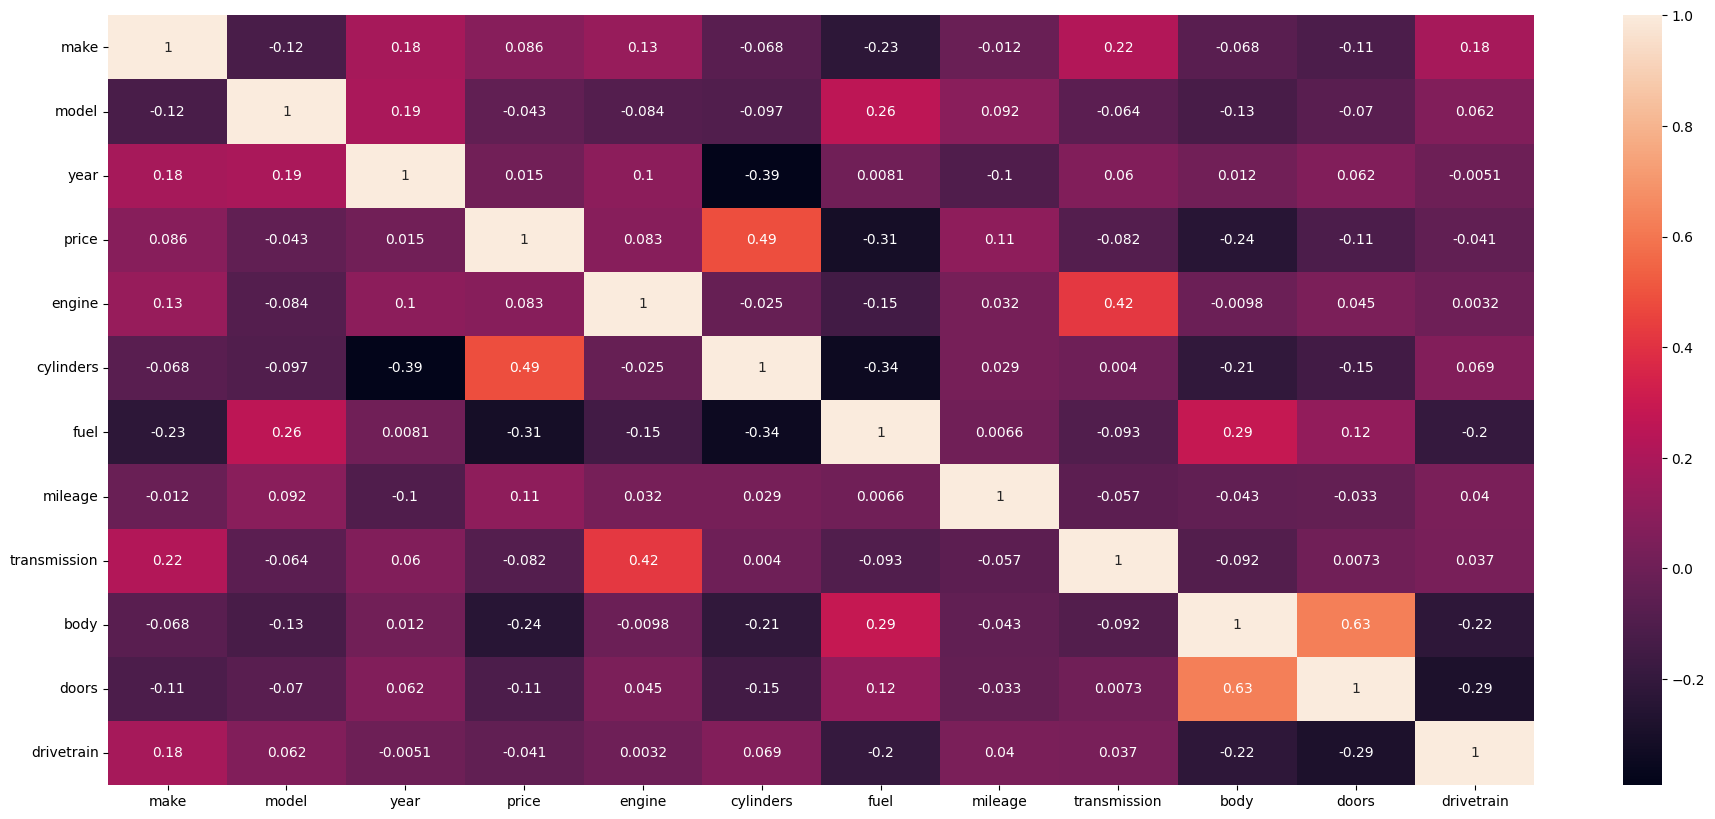

In [ ]:
# Membuat sebuah heatmap untuk korelasi antar variabel
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (23, 10))
sns.heatmap(df_correlation.corr(), annot=True)
plt.show()

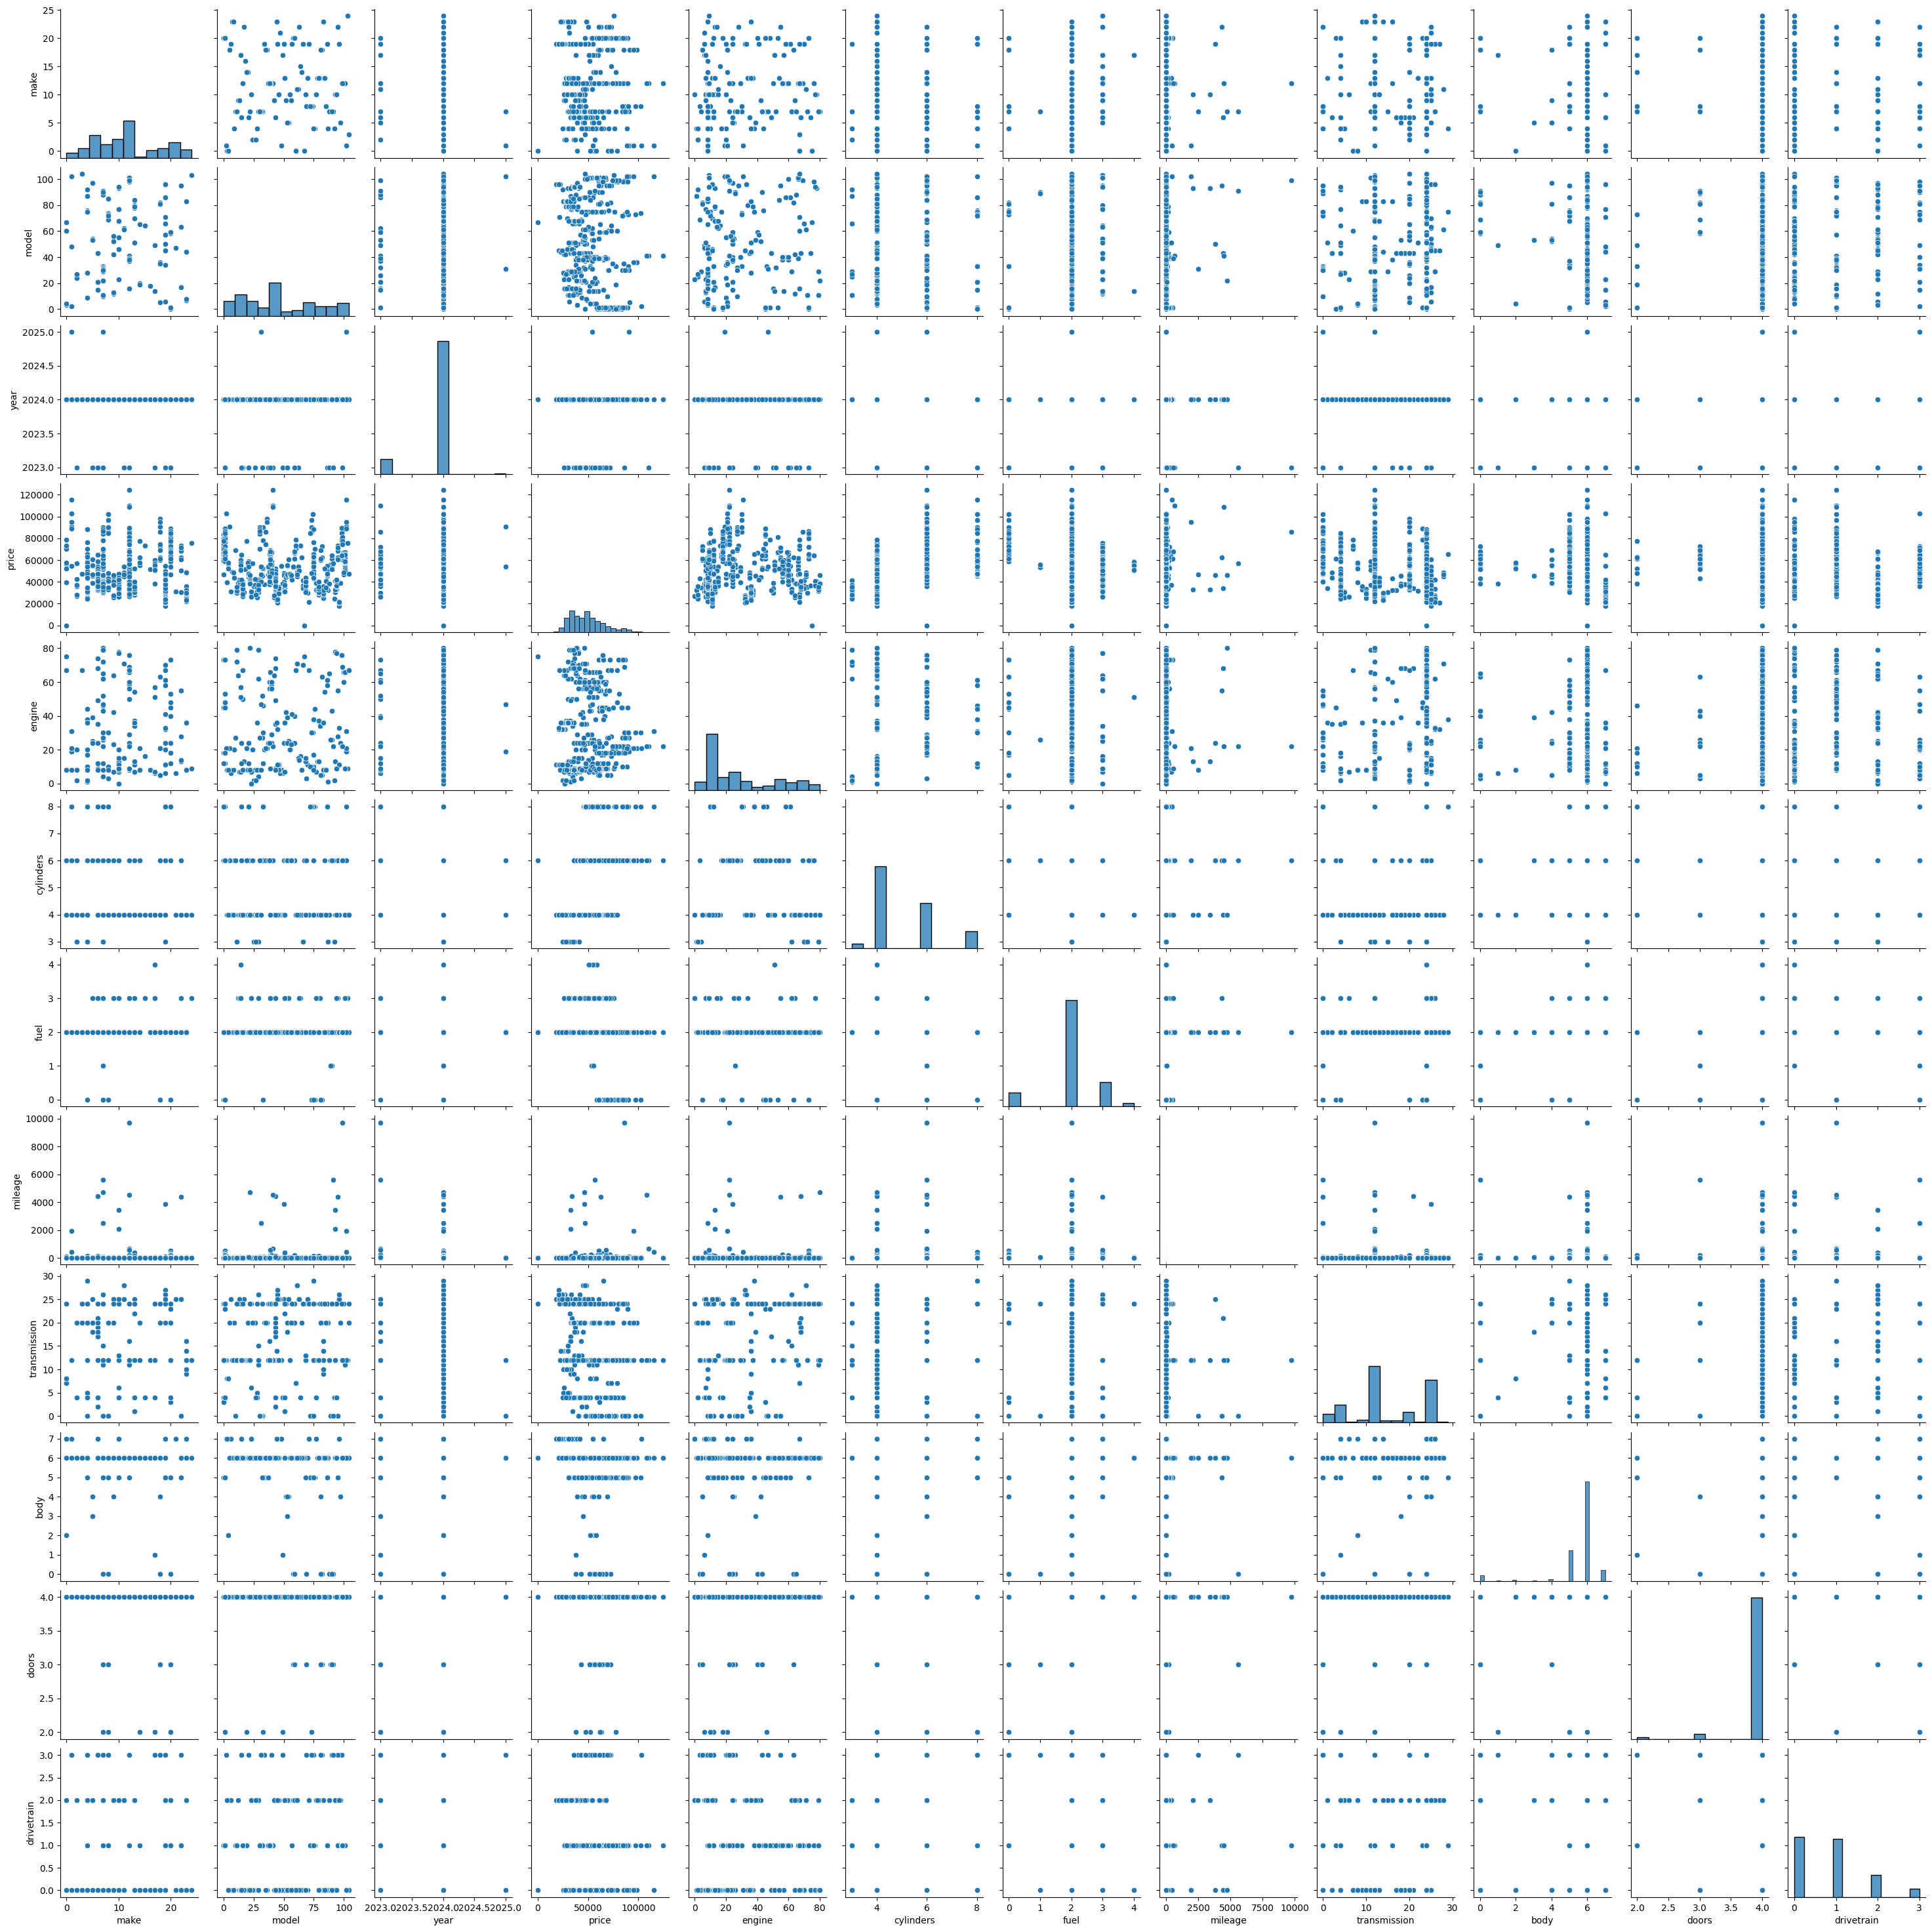

In [ ]:
# Membuat Pair Plot
sns.pairplot(df_correlation)

5. Meng-definisikan fitur dan target variabel yang akan digunakan

In [ ]:
# Define feature and target variable
# Mendefinisikan fitur dan target variabel yang akan digunakan
X = df.drop(columns=['price', 'name', 'description'])
y = df['price']

3. Mengubah kolom kategori menjadi kolom numerik dengan menggunakan  OneHotEncoder

In [ ]:
# Mengubah kolom kategori menjadi kolom numerik
# Identify categorical and numerical columns
# Identifikasi kolom kategori dan kolom numeric
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [ ]:
# Preprocessing for numerical data: impute missing values with mean
numerical_transformer = SimpleImputer(strategy='mean')

In [ ]:
# Preprocessing for categorical data: impute missing values with most frequent and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

6. Pre-proses data ke dalam model

In [ ]:
#Preprocess data
X_processed = preprocessor.fit_transform(X)

7. Membagi data menjadi data latihan dan data tes

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


8. Inisialisasi model serta set data latihan dan tes

In [ ]:
from sklearn.linear_model import Lasso
#inisialisasi model dan set training and test
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1053584503.1069905, tolerance: 15559170.127025384
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso()

In [ ]:
y_pred = lasso_model.predict(X_test)

9. Mencari Nilai MSE dan R2

In [ ]:
#mencari nilai MSE dan R2
from sklearn.metrics import mean_squared_error, r2_score

mse =   mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)

MSE: 41093929.70378494
R2: 0.8776198180453924


10. Membuat prediksi harga mobil untuk keseluruhan data

In [ ]:
# Predict the price for the entire dataset
predicted_prices = lasso_model.predict(X_processed)

In [ ]:
# Display the dataset with the predicted prices
df[['name', 'description', 'make', 'model', 'type', 'year', 'price', 'predicted_price', 'engine', 'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors', 'exterior_color', 'interior_color', 'drivetrain' ]]

,name,description,make,model,type,year,price,predicted_price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,77836.991329,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,46955.540720,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,47242.590498,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
3,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,78256.564634,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
4,2024 Nissan Murano Platinum,\n \n Boasts 28 Highway MPG and 20...,Nissan,Murano,New,2024,46000.0,45972.231165,24V MPFI DOHC,6.0,Gasoline,3838.0,Automatic CVT,Platinum,SUV,4.0,White,Gray,All-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,2024 BMW X7 xDrive40i,2024 BMW X7 xDrive40i,BMW,X7,New,2024,88695.0,89248.262552,24V GDI DOHC Turbo,6.0,Gasoline,9.0,8-Speed Automatic,xDrive40i,SUV,4.0,Sparkling,Black,All-wheel Drive
641,2024 Mercedes-Benz Sprinter 2500 144 WB Standa...,2024 Mercedes-Benz Sprinter 2500 Passenger 144...,Mercedes-Benz,Sprinter 2500,New,2024,69017.0,61559.690848,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,144 WB Standard Roof Passenger,Passenger Van,3.0,Jet Black,Black,Rear-wheel Drive
642,2024 RAM 3500 Tradesman,\n \n This Ram 3500 boasts a Inter...,RAM,3500,New,2024,60925.0,61441.058424,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,Automatic,Tradesman,Pickup Truck,4.0,Delmonico Red Pearlcoat,Black,Four-wheel Drive
643,2024 Kia Telluride SX X-Pro,Wolf Gray 2024 Kia Telluride SX X-Pro AWD 8-Sp...,Kia,Telluride,New,2024,51965.0,49426.172085,"II 3.8L V-6 gasoline direct injection, DOHC, D...",6.0,Gasoline,8.0,Automatic,SX X-Pro,SUV,4.0,Gray,Black,All-wheel Drive


11. Mengubah nilai akhir prediksi harga menjadi 2 desimal di akhir

In [ ]:
# Round the predicted prices to 2 decimal places
df['predicted_price'] = df['predicted_price'].round(2)

In [ ]:
df

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,predicted_price
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,77836.99
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,46955.54
2,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,47242.59
3,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,78256.56
4,2024 Nissan Murano Platinum,\n \n Boasts 28 Highway MPG and 20...,Nissan,Murano,New,2024,46000.0,24V MPFI DOHC,6.0,Gasoline,3838.0,Automatic CVT,Platinum,SUV,4.0,White,Gray,All-wheel Drive,45972.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,2024 BMW X7 xDrive40i,2024 BMW X7 xDrive40i,BMW,X7,New,2024,88695.0,24V GDI DOHC Turbo,6.0,Gasoline,9.0,8-Speed Automatic,xDrive40i,SUV,4.0,Sparkling,Black,All-wheel Drive,89248.26
641,2024 Mercedes-Benz Sprinter 2500 144 WB Standa...,2024 Mercedes-Benz Sprinter 2500 Passenger 144...,Mercedes-Benz,Sprinter 2500,New,2024,69017.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,144 WB Standard Roof Passenger,Passenger Van,3.0,Jet Black,Black,Rear-wheel Drive,61559.69
642,2024 RAM 3500 Tradesman,\n \n This Ram 3500 boasts a Inter...,RAM,3500,New,2024,60925.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,Automatic,Tradesman,Pickup Truck,4.0,Delmonico Red Pearlcoat,Black,Four-wheel Drive,61441.06
643,2024 Kia Telluride SX X-Pro,Wolf Gray 2024 Kia Telluride SX X-Pro AWD 8-Sp...,Kia,Telluride,New,2024,51965.0,"II 3.8L V-6 gasoline direct injection, DOHC, D...",6.0,Gasoline,8.0,Automatic,SX X-Pro,SUV,4.0,Gray,Black,All-wheel Drive,49426.17


In [ ]:
# Display the shape of the processed data to confirm
print("Shape of processed data:", X_processed.shape)
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of processed data: (645, 686)
Shape of training set: (516, 686)
Shape of test set: (129, 686)


In [ ]:
 # Save the result to a new csv file
df.to_csv('predicted.csv', index=False)